# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = "countries of the world.csv"  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [6]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Changing comma to dot          <br>
2- Null values to be dealt with         <br>
3- Change object datatype to float datatype          <br>
4- Dealing with duplictes          <br>


In [5]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

## Changing comma in columns to dot for space

In [6]:
df_copy.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [7]:
#solution 
for col in df_copy.columns[4:]:
    if col == "GDP ($ per capita)":
        pass
    else:
        df_copy[col] = df_copy[col].str.replace(',', '.')

In [8]:
#test 
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,NaN,NaN,NaN


**Second issue**

## Change object datatype to float datatype

In [9]:
#solution 
for col in df_copy.columns[4:]:
    if col == "GDP ($ per capita)":
        pass
    else:
        df_copy[col] = df_copy[col].astype('float64')

In [12]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Third issue**

## Null values to be dealt with

In [13]:
#fill null values with median
df_copy = df_copy.fillna(df_copy.median())

In [14]:
# test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

**Forth issue**

## Dealing with dupplicates

In [15]:
df_copy.duplicated().sum()

0

In [16]:
df_copy.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.037621,35.315242,9671.585903,83.604405,235.006608,13.767357,4.533084,81.674097,2.125551,22.070793,9.216652,0.147419,0.281956,0.565661
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856712,35.193412,10030.645350,19.100523,226.103017,12.986425,8.330968,16.073758,0.665761,11.108805,4.949120,0.142429,0.133316,0.160249
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.435000,95.230000,2.250000,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Lets look at outliers

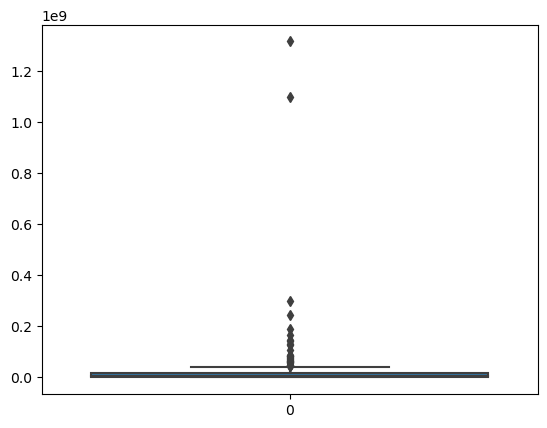

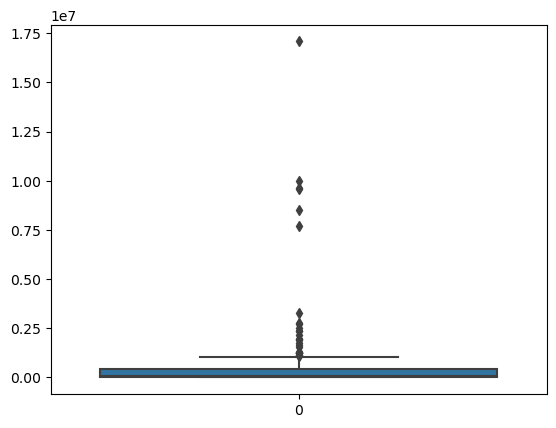

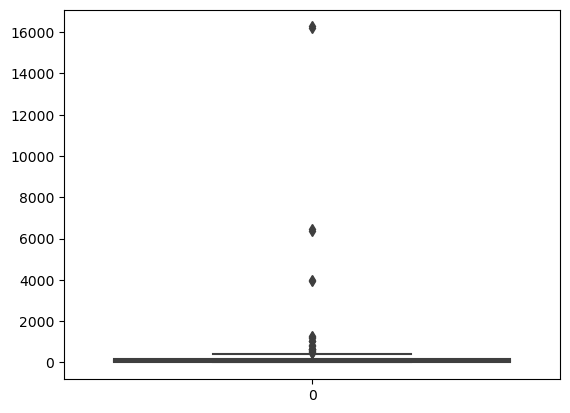

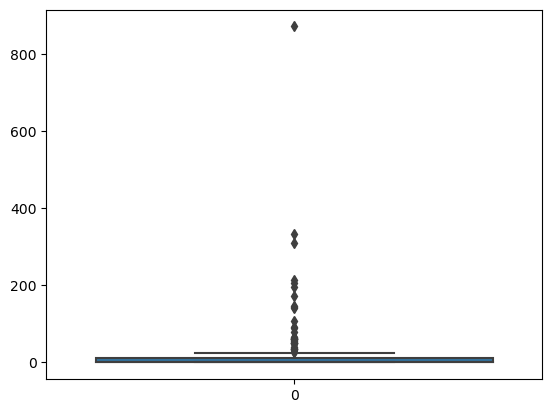

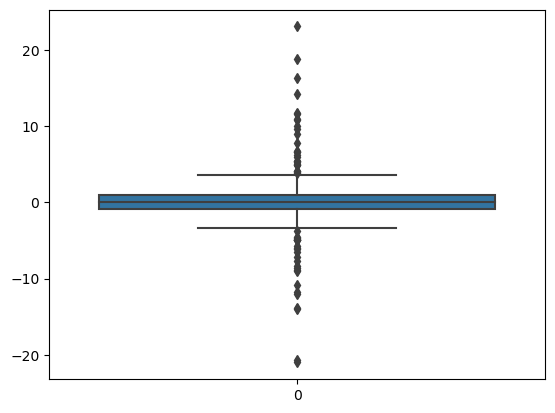

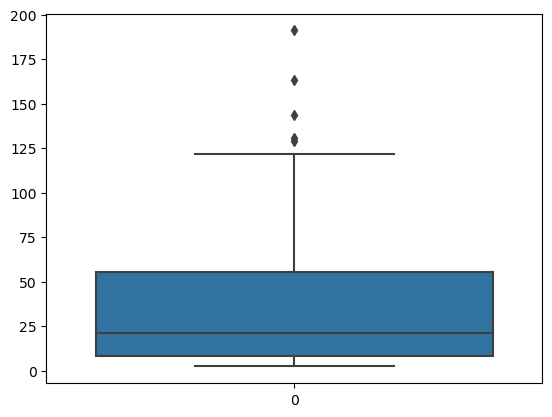

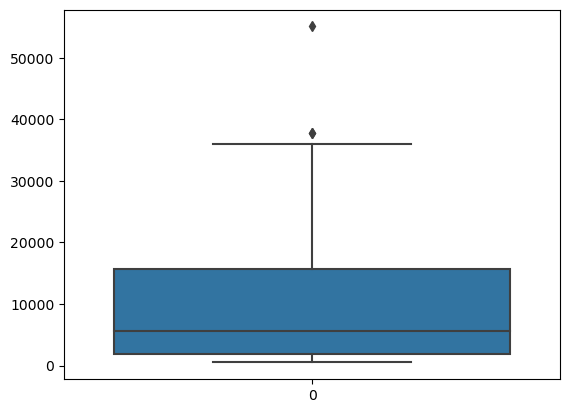

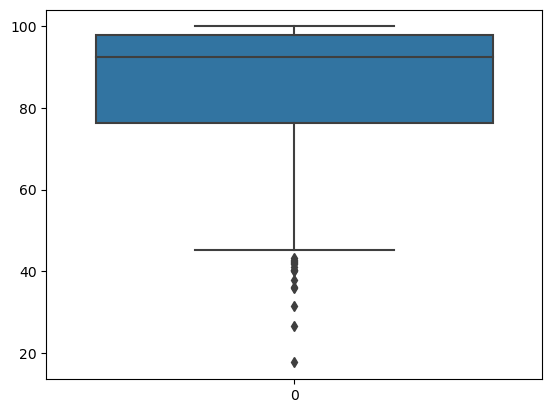

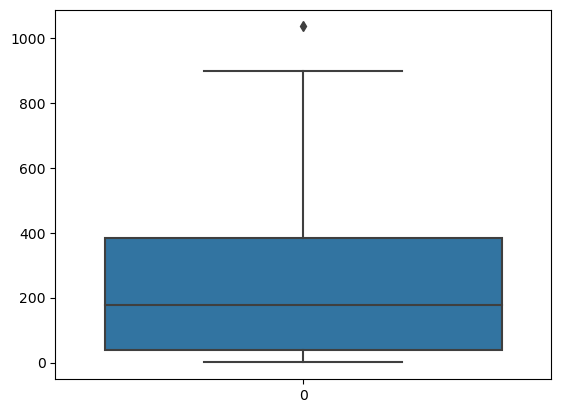

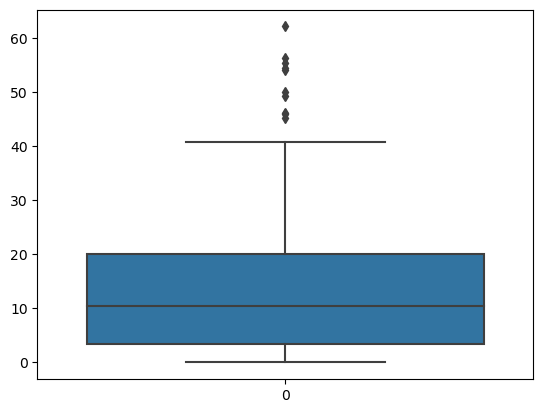

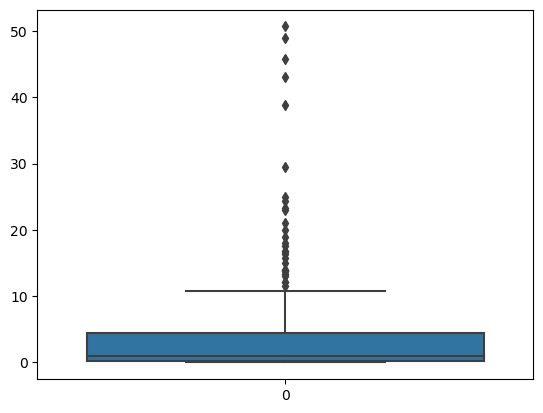

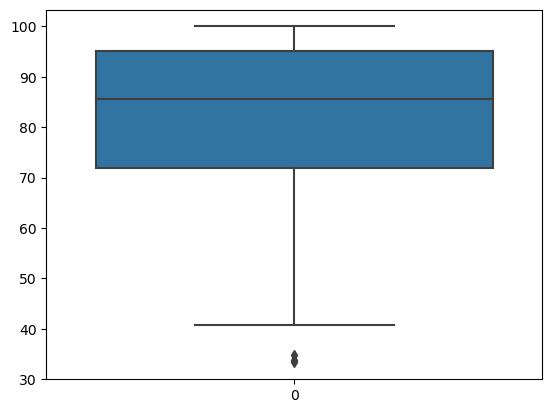

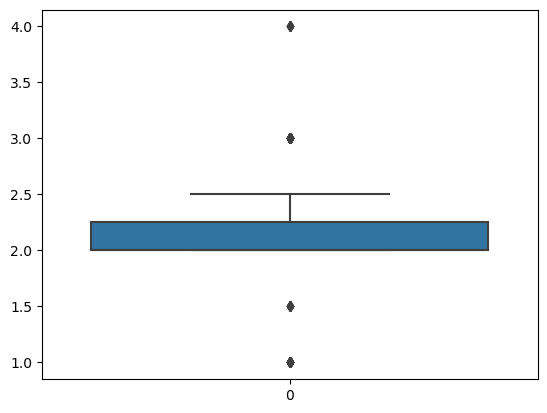

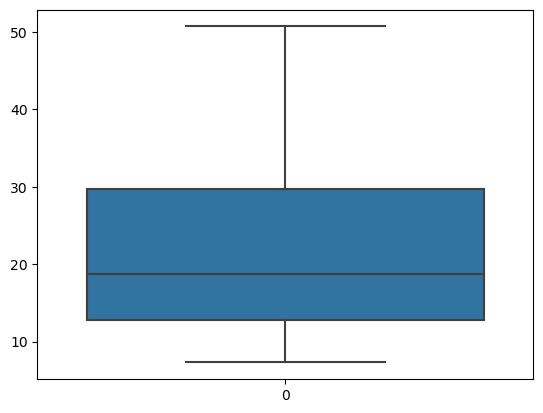

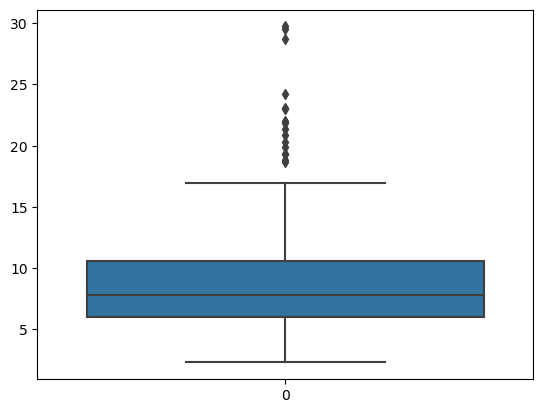

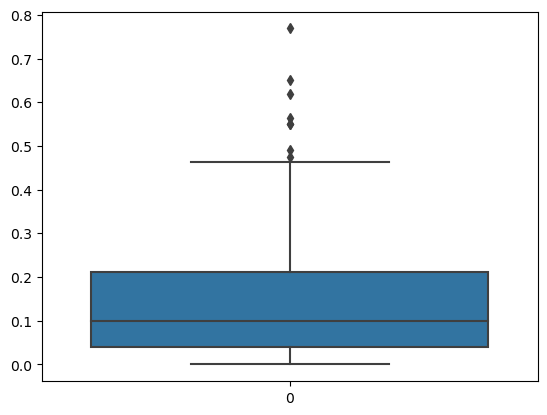

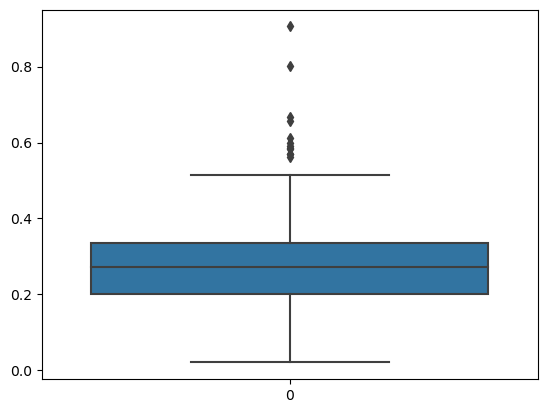

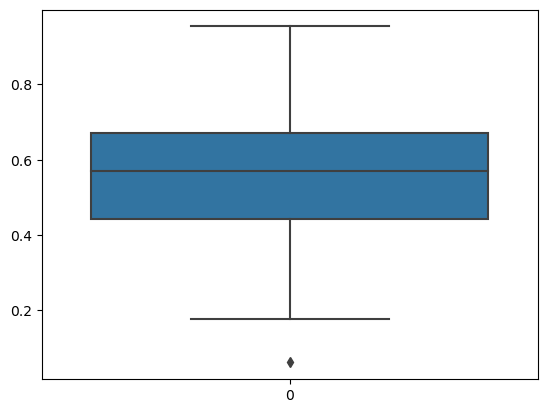

In [17]:
for col in df_copy.columns[2:]:
    sns.boxplot(df_copy[col])
    plt.show()

In [18]:
df_copy = df_copy[df_copy['Deathrate'] < 18]
df_copy = df_copy[df_copy['Infant mortality (per 1000 births)']<125]
df_copy = df_copy[df_copy['Agriculture'] < 0.48]
df_copy = df_copy[df_copy['Other (%)'] > 40]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 224
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             204 non-null    object 
 1   Region                              204 non-null    object 
 2   Population                          204 non-null    int64  
 3   Area (sq. mi.)                      204 non-null    int64  
 4   Pop. Density (per sq. mi.)          204 non-null    float64
 5   Coastline (coast/area ratio)        204 non-null    float64
 6   Net migration                       204 non-null    float64
 7   Infant mortality (per 1000 births)  204 non-null    float64
 8   GDP ($ per capita)                  204 non-null    float64
 9   Literacy (%)                        204 non-null    float64
 10  Phones (per 1000)                   204 non-null    float64
 11  Arable (%)                          204 non-n

## Lets use LabelEncoder for Country and Region

In [23]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_copy['Country'] = labelencoder.fit_transform(df_copy['Country'])
df_copy['Region'] = labelencoder.fit_transform(df_copy['Region'])
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1,0,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,1,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2,8,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,3,10,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571
6,4,4,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,199,4,108605,1910,56.9,9.84,-8.94,8.03,17200.0,92.5,652.8,11.76,2.94,85.30,2.0,13.96,6.43,0.010,0.190,0.800
221,200,8,16025,274,58.5,47.08,0.00,21.00,3700.0,50.0,118.6,5.00,25.00,70.00,2.0,18.79,7.84,0.099,0.272,0.571
222,201,5,2460492,5860,419.9,0.00,2.98,19.62,800.0,92.5,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,202,6,273008,266000,1.0,0.42,0.00,21.00,5550.0,92.5,176.2,0.02,0.00,99.98,1.0,18.79,7.84,0.099,0.272,0.400


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [24]:
from sklearn import preprocessing

In [25]:
from sklearn.preprocessing import MinMaxScaler

df_copy_scaled = df_copy.copy() #scaled min max
#cols to be scaled
cols = df_copy.columns
features = df_copy[cols]
#MinMax scaling
scaler = MinMaxScaler()
df_copy_scaled[cols] = scaler.fit_transform(features.values)
df_copy_scaled


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1,0.000000,0.3,0.002720,0.001683,0.007658,0.001447,0.404127,0.167948,0.073260,0.816076,0.067582,0.375200,0.087214,0.569015,0.666667,0.183870,0.200000,0.488421,0.189616,0.579596
2,0.004926,0.6,0.025056,0.139485,0.000848,0.000046,0.518369,0.250742,0.100733,0.591281,0.074253,0.057285,0.004933,0.941375,0.000000,0.231601,0.158362,0.212632,0.654628,0.264574
3,0.009852,0.8,0.000039,0.000012,0.017847,0.066949,0.007046,0.060961,0.137363,0.959128,0.249637,0.177904,0.295975,0.577631,0.333333,0.356689,0.066894,0.208421,0.284424,0.570628
4,0.014778,1.0,0.000049,0.000027,0.009348,0.000000,0.694263,0.015371,0.338828,1.000000,0.479455,0.039495,0.000000,0.962494,0.666667,0.033388,0.270307,0.208421,0.284424,0.570628
6,0.019704,0.4,0.000005,0.000006,0.008118,0.068684,0.798943,0.163668,0.148352,0.931880,0.443488,0.000000,0.000000,1.000000,0.333333,0.161768,0.208191,0.084211,0.180587,0.804933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.980296,0.4,0.000077,0.000112,0.003497,0.011302,0.303221,0.050131,0.305861,0.897820,0.629895,0.209215,0.058011,0.751647,0.333333,0.156830,0.282594,0.021053,0.191874,0.827354
221,0.985222,0.8,0.000007,0.000016,0.003595,0.054074,0.528183,0.163406,0.058608,0.318801,0.113410,0.088952,0.493291,0.493158,0.333333,0.270397,0.378840,0.208421,0.284424,0.570628
222,0.990148,0.5,0.001867,0.000343,0.025806,0.000000,0.603171,0.151354,0.005495,0.897820,0.139128,0.300658,0.374309,0.393985,0.666667,0.573242,0.111263,0.189474,0.293454,0.636771
223,0.995074,0.6,0.000202,0.015578,0.000061,0.000482,0.528183,0.163406,0.092491,0.897820,0.169100,0.000356,0.000000,0.999662,0.000000,0.270397,0.378840,0.208421,0.284424,0.378924


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>

1- Linkage criteria : The linkage criterion determines the distance between two clusters

    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:

    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 

3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

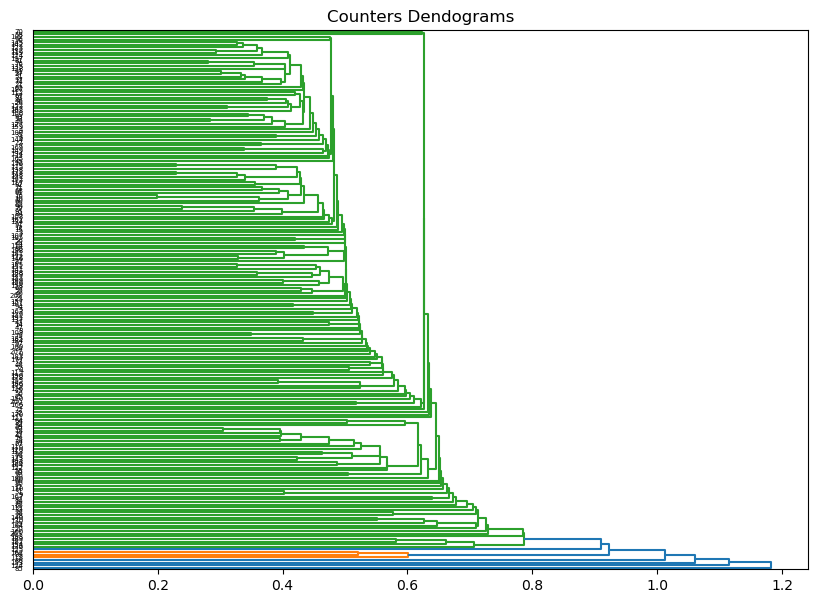

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(df_copy_scaled , method='single',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

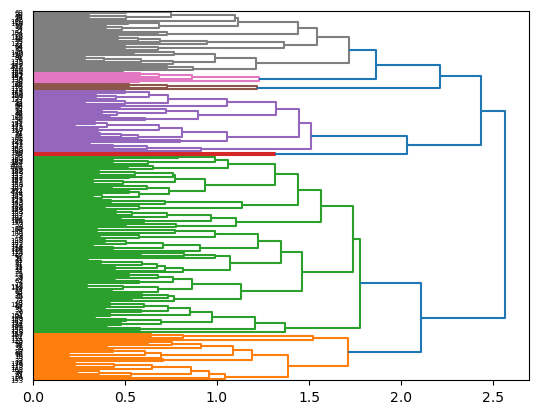

In [27]:
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='complete',metric='euclidean'),orientation='right')


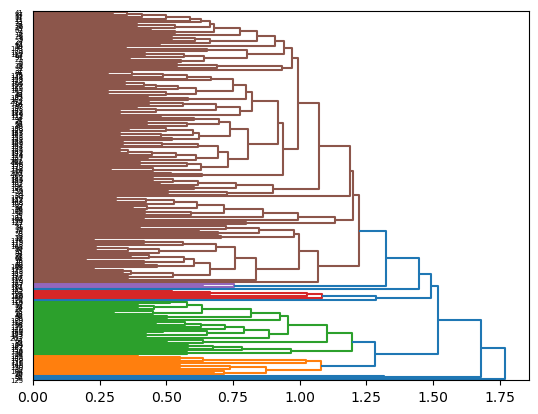

In [28]:
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='average',metric='euclidean'),orientation='right')

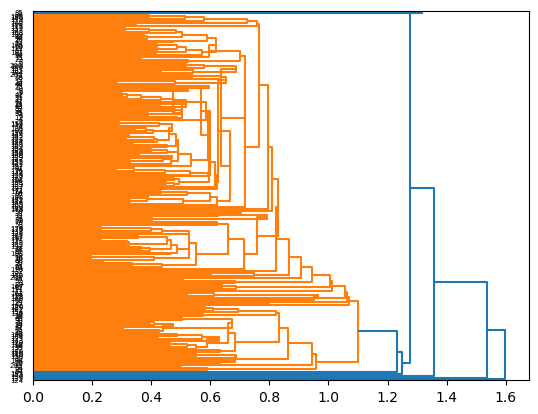

In [29]:
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='centroid',metric='euclidean'),orientation='right')

In [30]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6).fit(df_copy_scaled)
labels = clustering.labels_
print(labels)




[2 0 0 5 0 0 2 2 0 0 5 4 0 0 0 2 5 0 1 0 4 0 2 0 0 4 2 1 1 4 1 0 0 0 1 2 4
 0 1 1 0 0 1 0 3 2 2 5 0 3 4 0 0 3 1 1 2 1 5 0 5 5 0 0 1 1 3 2 5 1 5 5 0 0
 0 0 4 5 1 4 4 4 0 2 5 4 4 4 0 5 5 0 5 3 0 5 0 2 1 3 2 0 0 4 4 2 3 0 5 2 5
 0 2 1 4 3 1 5 3 0 1 5 1 0 3 5 4 3 4 0 4 5 0 0 0 4 1 0 5 0 4 0 0 1 4 0 3 2
 5 0 0 0 2 0 1 0 0 0 0 3 3 5 3 0 1 3 0 0 2 0 1 5 3 1 0 5 5 4 0 4 1 3 1 0 3
 3 4 0 0 1 2 0 5 5 0 4 1 0 3 0 0 3 0 1]


### Silhouette_Score or any other evalution method

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 